# Final Project
### kNN Regression - Diabetes Data 
### Lauren Rega



In [80]:
# First, import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # this is for plotting the data
import seaborn as sns            # this is for visualization

%matplotlib inline

In [81]:
#read the file
diabetes = pd.read_csv("diabetes.csv") 

In [82]:

diabetes.shape # shows shape of dataset

(768, 9)

In [83]:
diabetes.head() #shows first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
diabetes.info() #shows attributes and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
# First, use the "isnull()" method to locate the null values if any...
diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [86]:
# No null values! Let's look at summary statistics

diabetes.describe() 
# Notice that some of these values cannot be zero (Glucose level, BloodPressure, SkinThickness, Insulin, BMI) 
# So we will need to clean the dataset. There are also some maximum values that are far away from the mean. 
# We will take a further look to gain more insight.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

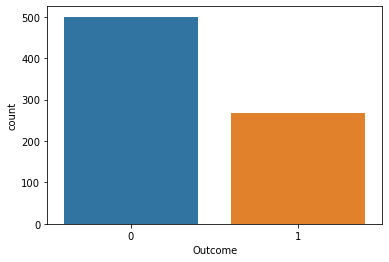

In [87]:
# A simple barchart of our label, 'Outcome', will give us some perspective on the number of females
#who did & did not have diabetes
sns.countplot(x='Outcome',data=diabetes)

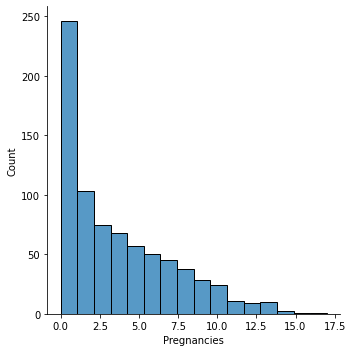

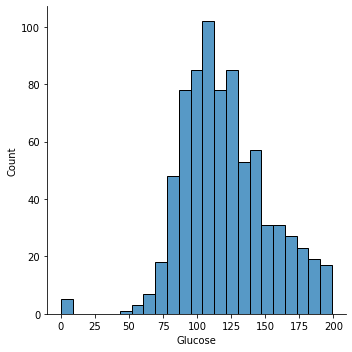

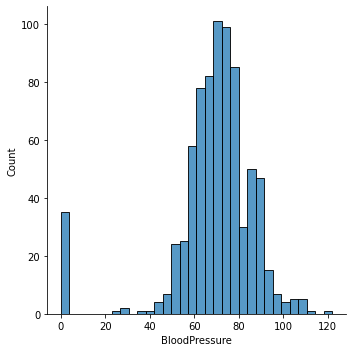

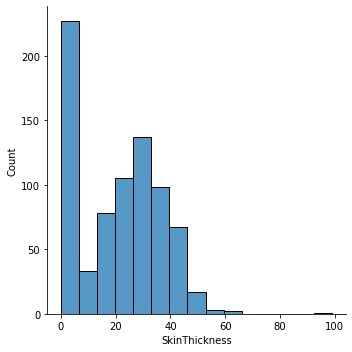

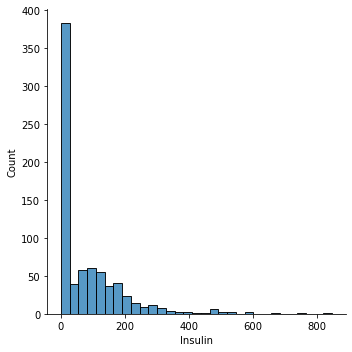

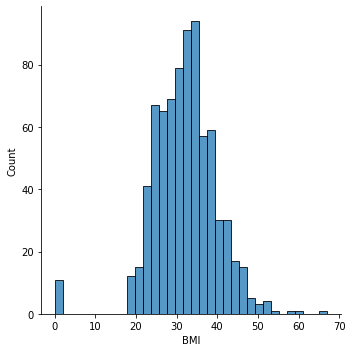

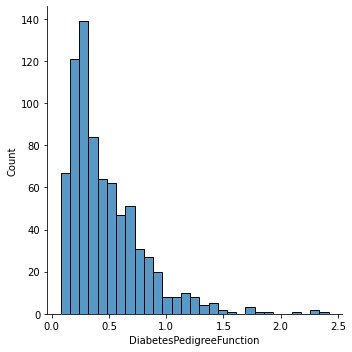

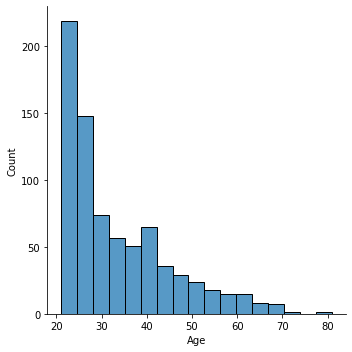

In [88]:
#lets take a closer look at the distribution plots for our independent variables:
sns.displot(diabetes['Pregnancies'])
sns.displot(diabetes['Glucose'])
sns.displot(diabetes['BloodPressure'])
sns.displot(diabetes['SkinThickness'])
sns.displot(diabetes['Insulin'])
sns.displot(diabetes['BMI'])
sns.displot(diabetes['DiabetesPedigreeFunction'])
sns.displot(diabetes['Age'])

In [89]:
#As suspected some of the attributes have zero's which are skewing the distribution. Let's clean the dataset. 
diabetes['Glucose'] = diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())
diabetes['Insulin'] = diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes['BMI'] = diabetes['BMI'].replace(0,diabetes['BMI'].mean())


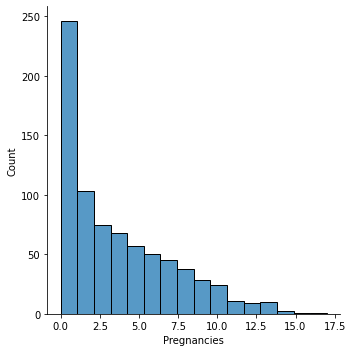

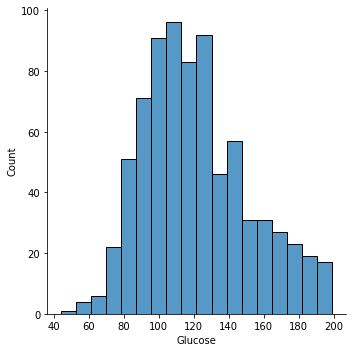

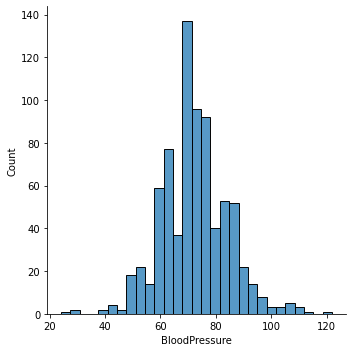

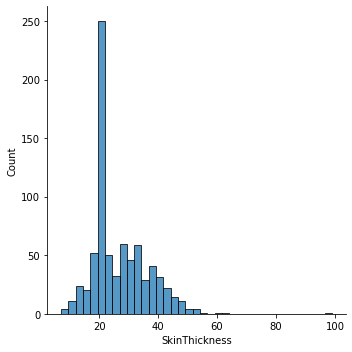

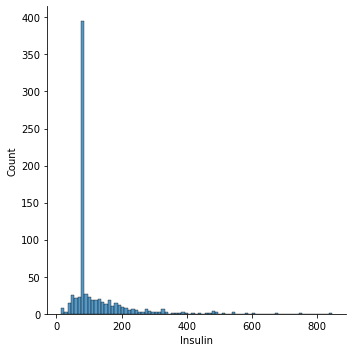

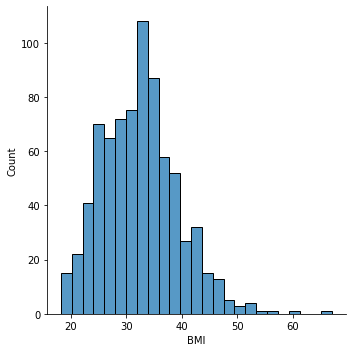

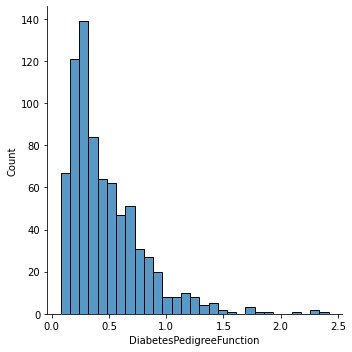

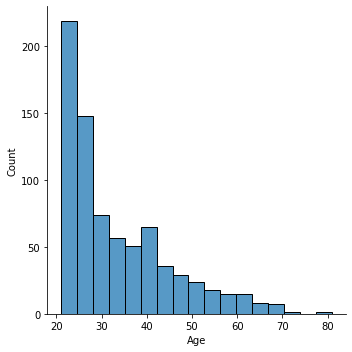

In [90]:
#Now that the zero's are fixed, lets take another look at the distribution plots for our independent variables:
sns.displot(diabetes['Pregnancies'])
sns.displot(diabetes['Glucose'])
sns.displot(diabetes['BloodPressure'])
sns.displot(diabetes['SkinThickness'])
sns.displot(diabetes['Insulin'])
sns.displot(diabetes['BMI'])
sns.displot(diabetes['DiabetesPedigreeFunction'])
sns.displot(diabetes['Age'])

In [91]:
# some of these features still looked skewed. Let's remove outliers using the Interquartile Range method
# First, define a function called 'outliers' which returns an index of outliers
#IQR = Q3-Q1
# +/- 1.5*IQR
def outliers(df, ft): # inputs are dataframe and feature
    Q1 = df[ft].quantile(0.25) #calculate first quantile
    Q3 = df[ft].quantile(0.75) #calculate third quantile
    IQR = Q3 - Q1 # calculate IQR
    #calc lower & upper bound: 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # create a list which will store the indexes of the outliers
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)] # if conditions return true, it is outlier
    
    return ls # returns list



In [92]:
# Now, create an empty list to store output indicies from multiple columns

index_list = []
for feature in['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    index_list.extend(outliers(diabetes, feature))
    

In [93]:
# Let's see our index list
index_list

[88,
 159,
 298,
 455,
 18,
 43,
 84,
 106,
 125,
 177,
 362,
 549,
 597,
 599,
 658,
 662,
 672,
 691,
 57,
 86,
 99,
 120,
 150,
 211,
 273,
 275,
 445,
 532,
 579,
 591,
 8,
 13,
 16,
 20,
 31,
 39,
 43,
 53,
 54,
 56,
 73,
 95,
 99,
 111,
 132,
 139,
 144,
 150,
 153,
 162,
 186,
 195,
 199,
 206,
 215,
 220,
 228,
 231,
 247,
 248,
 254,
 258,
 279,
 286,
 287,
 296,
 297,
 309,
 320,
 335,
 359,
 360,
 364,
 370,
 375,
 388,
 392,
 395,
 409,
 412,
 415,
 424,
 425,
 452,
 458,
 480,
 485,
 486,
 487,
 511,
 519,
 538,
 540,
 545,
 546,
 555,
 561,
 574,
 584,
 594,
 606,
 608,
 612,
 645,
 655,
 657,
 662,
 673,
 679,
 685,
 695,
 700,
 707,
 710,
 713,
 715,
 721,
 748,
 753,
 120,
 125,
 177,
 193,
 247,
 303,
 445,
 673,
 4,
 12,
 39,
 45,
 58,
 100,
 147,
 187,
 218,
 228,
 243,
 245,
 259,
 292,
 308,
 330,
 370,
 371,
 383,
 395,
 445,
 534,
 593,
 606,
 618,
 621,
 622,
 659,
 661,
 123,
 363,
 453,
 459,
 489,
 537,
 666,
 674,
 684]

In [94]:
# Next, define a function called 'remove' which returns a cleaned dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls)) #organize list
    df = df.drop(ls) # drop values
    return df

In [95]:
df_cleaned = remove(diabetes, index_list)

In [96]:
df_cleaned.shape # our row count has reduced!

(619, 9)

In [97]:
#Lets save the data to new csv
df_cleaned.to_csv('diabetes_cleaned.csv', index=False)


In [98]:
#read the file
diabetes_cleaned = pd.read_csv("diabetes_cleaned.csv") 

In [99]:
diabetes_cleaned.describe() 
#Lets see what our new summary statistics look like

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,3.796446,117.310941,71.624363,25.249849,91.649792,31.551427,0.416362,32.500808,0.311793
std,3.230706,28.132574,10.959187,8.202458,33.777507,6.229763,0.244863,10.980621,0.463600
min,0.000000,44.000000,44.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,20.536458,79.799479,27.000000,0.236500,24.000000,0.000000
50%,3.000000,112.000000,70.000000,20.536458,79.799479,31.600000,0.340000,29.000000,0.000000
75%,6.000000,133.000000,78.000000,31.000000,94.000000,35.350000,0.564500,40.000000,1.000000
max,13.000000,197.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000,1.000000


In [100]:
diabetes_cleaned.shape # Checking the shape again

(619, 9)

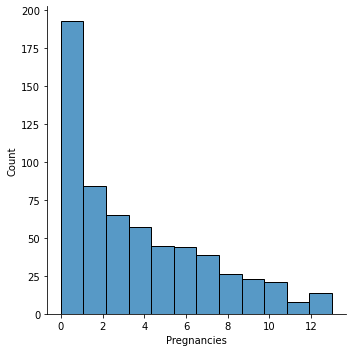

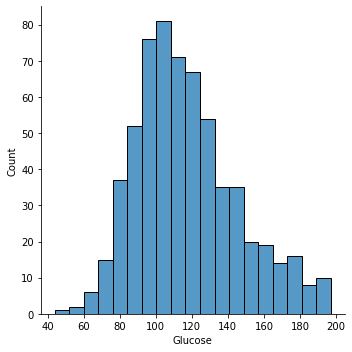

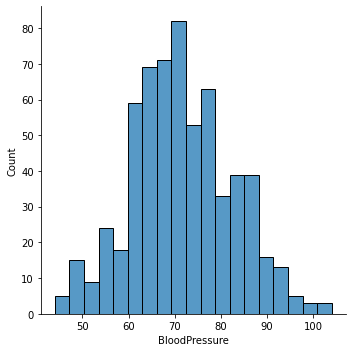

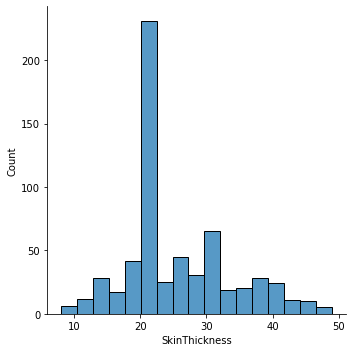

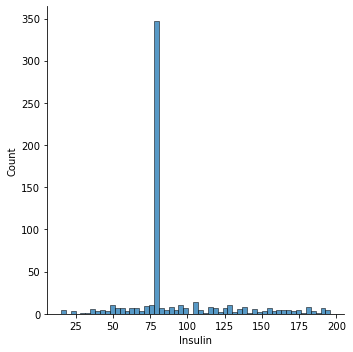

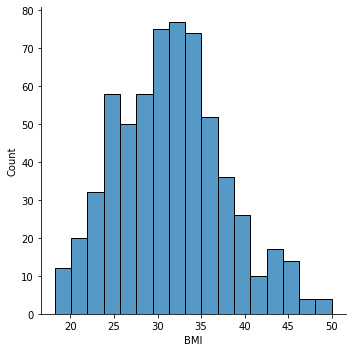

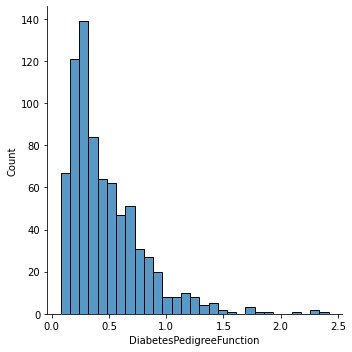

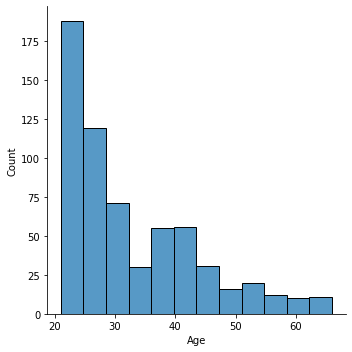

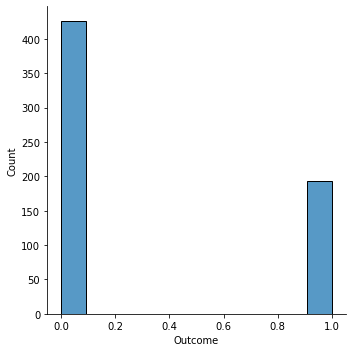

In [101]:
#lets see what our distribution plots look like now that we have removed outliers:
sns.displot(diabetes_cleaned['Pregnancies'])
sns.displot(diabetes_cleaned['Glucose'])
sns.displot(diabetes_cleaned['BloodPressure'])
sns.displot(diabetes_cleaned['SkinThickness'])
sns.displot(diabetes_cleaned['Insulin'])
sns.displot(diabetes_cleaned['BMI'])
sns.displot(diabetes['DiabetesPedigreeFunction'])
sns.displot(diabetes_cleaned['Age'])
sns.displot(diabetes_cleaned['Outcome'])

In [102]:
#Looks great! Now lets start our kNN model.
#First Define X & y:
X = diabetes_cleaned.drop(columns = ['Outcome'])
y = diabetes_cleaned['Outcome']

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# Now we scale our data so that the algorithm will perform better
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

In [105]:
#Lets see what our scaled data looks like:
X_scalar

array([[ 0.68261737,  1.09175498,  0.03430374, ...,  0.3291024 ,
         0.86092316,  1.59493212],
       [-0.86628347, -1.14945302, -0.51362487, ..., -0.79544459,
        -0.26714798, -0.1367884 ],
       [ 1.3021777 ,  2.33687054, -0.69626775, ..., -1.32558817,
         1.0448478 , -0.04564521],
       ...,
       [ 0.3728372 ,  0.13123727,  0.03430374, ..., -0.85970442,
        -0.7003927 , -0.22793158],
       [-0.86628347,  0.30911092, -1.06155349, ..., -0.2331711 ,
        -0.27532241,  1.32150256],
       [-0.86628347, -0.86485518, -0.14833913, ..., -0.18497622,
        -0.4142877 , -0.86593388]])

In [106]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scalar, y, random_state = 100)

In [107]:
# Creating a classifier object in sklearn
knn = KNeighborsClassifier(p=1)

In [108]:
# Fitting our model
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [109]:
# Making predictions
predictions = knn.predict(X_test)
print(predictions)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 0 0]


In [110]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))


0.7612903225806451
0.6666666666666666
0.52


In [111]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.67      0.52      0.58        50

    accuracy                           0.76       155
   macro avg       0.73      0.70      0.71       155
weighted avg       0.75      0.76      0.75       155



In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[92, 13],
       [24, 26]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

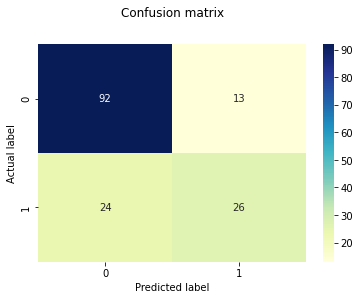

In [67]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
tpr = conf_mat[0][0]
fpr = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

0.6980952380952381


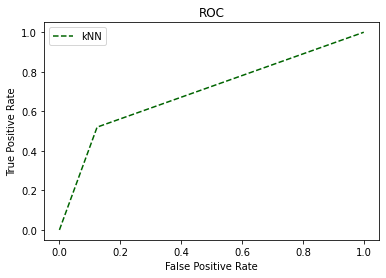

In [69]:
# auc scores
auc_score = roc_auc_score(y_test, predictions)

print(auc_score)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(fpr, tpr, linestyle='--',color='darkgreen', label='kNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()


In [70]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors':  range(1, 15, 2),
    'p': [1,2],
    'weights': ['uniform', 'distance']
}


knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

knn.fit(X_train, y_train)
print(knn.best_params_)# returns best parameters according to gridsearch

# Returns: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


In [71]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.

knn = KNeighborsClassifier(n_neighbors = 11, p =1, weights = 'uniform')

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [73]:
knn.score(X_train,y_train)

0.8060344827586207

In [74]:
knn.score(X_test,predictions)

0.9096774193548387

In [75]:
predictions = knn.predict(X_test)


In [76]:
print(classification_report(y_test , predictions))

#you can see that our f1 scores and accuracies have decreased 

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.70      0.52      0.60        50

    accuracy                           0.77       155
   macro avg       0.75      0.71      0.72       155
weighted avg       0.77      0.77      0.76       155



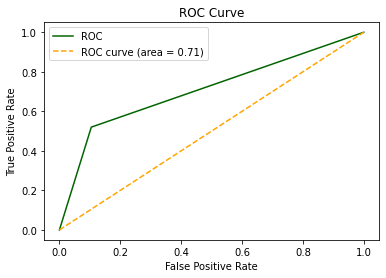

In [77]:
# Area Under Curve
auc = roc_auc_score(y_test, predictions)
auc


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, color='darkgreen', label='ROC')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()